#### It's assumed that you are already familiar with concepts such as linear algebra, in particular with matrices and vectors. We will use python library "Numpy" and also internal functions of PyTorch for work with these basic objects of linear algebra.

In [2]:
import torch
import torch.nn as nn

import numpy as np
from sklearn.metrics import r2_score, explained_variance_score
import matplotlib.pyplot as plt

In [3]:
# torch.nn.Module allows us to build custom classes
class LR(nn.Module):
    def __init__(self, in_features, out_features, in_data, target_data):
        # in_features - the number of inputs, out_features - the number of outputs of our network
        super().__init__()
        self.X = in_data
        self.y = target_data
        self.linear = nn.Linear(in_features, out_features) # define a linear model
    
    def get_params(self):
        # Function parameters() returns values of weigth and bias
        # In our case, function will return torch.tensor([[weigt]]) and torch.tensor([bias])
        [w, b] = self.parameters()
        return w[0][0].item(), b[0].item()
    
    def build_plot(self):
        weight, bias = self.get_params()
        x1 = np.array([-35, 35])
        y1 = weight*x1 + bias
        plt.plot(x1, y1, 'r', label="Fitted line")
        plt.scatter(self.X, self.y, label="Original data")
        plt.legend()
        plt.show()
        
    def forward(self):
        y_pred = self.linear(self.X)
        return y_pred

In [4]:
X = torch.randn(100, 1) * 15
y = X + 10*torch.randn(100, 1)

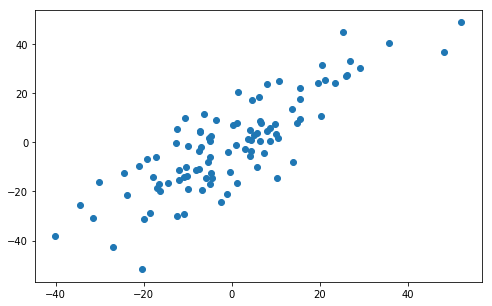

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(X.numpy(), y.numpy(), 'o');

In [6]:
linear_model = LR(1, 1, X, y)

### Model without training

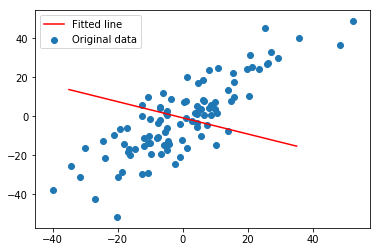

Weight = -0.4151899814605713, 
bias = -0.8122251033782959


In [7]:
# Building plot
linear_model.build_plot()
 
w, b = linear_model.get_params()
print(f"Weight = {w}, \nbias = {b}")

In [8]:
# Set Mean Squared Error as a loss function
criterion = nn.MSELoss()

# Set stochastic gradient descent
# More: https://en.wikipedia.org/wiki/Stochastic_gradient_descent
optimiser = torch.optim.SGD(linear_model.parameters(), lr=0.001)
epoches = 100

### Training

In [9]:
for epoch in range(epoches):
    y_pred = linear_model.forward()
    loss = criterion(y_pred, linear_model.y)
    
    # Zero value of the gradient descent that it doesn't accumulate
    optimiser.zero_grad()
    
    # Run an algorithm of backpropagation
    loss.backward()
    
    # Update our weights
    optimiser.step()
    
    if epoch % 5 == 0:
        print(f"{epoch}/{epoches}, loss = {loss.item()}")

0/100, loss = 626.2774047851562
5/100, loss = 109.61009979248047
10/100, loss = 109.39925384521484
15/100, loss = 109.39911651611328
20/100, loss = 109.39906311035156
25/100, loss = 109.39901733398438
30/100, loss = 109.39896392822266
35/100, loss = 109.39891815185547
40/100, loss = 109.39886474609375
45/100, loss = 109.39881896972656
50/100, loss = 109.39877319335938
55/100, loss = 109.39873504638672
60/100, loss = 109.39868927001953
65/100, loss = 109.39864349365234
70/100, loss = 109.39859771728516
75/100, loss = 109.3985595703125
80/100, loss = 109.39852142333984
85/100, loss = 109.39848327636719
90/100, loss = 109.3984375
95/100, loss = 109.39840698242188


### Trained model

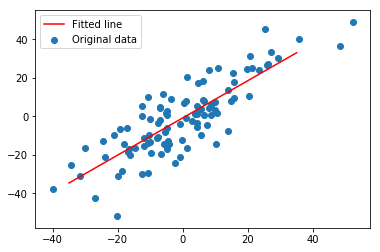

Weight = 0.9661353826522827, 
bias = -0.8038343191146851


In [10]:
linear_model.build_plot()

w, b = linear_model.get_params()
print(f"Weight = {w}, \nbias = {b}")

### Some characteristics of model

In [11]:
y_pred = linear_model.forward().detach().numpy()

In [12]:
r2_score = r2_score(y_pred, y.numpy())
explained_var = explained_variance_score(y_pred, y.numpy())

In [13]:
print(f"Coefficient of determination = {round(r2_score, 4)}")
print(f"Explained variation = {round(explained_var, 4)}")

Coefficient of determination = 0.5673
Explained variation = 0.5673
